# Machine Learning and Visualizations

in this notebook I will apply two methods with the aim of predicting sentiment of a tweet 




In [9]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

sns.set() 

In [10]:
#Read in data set
tweets = pd.read_csv('all_sentiments.csv')


In [11]:
tweets.head()

,id,user_description,user_location,coordinates,text,geo,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,text_eng,neg,neu,pos,compound,sentiment
0,1,oud gemeenteraadslid voor D66,europe nl leiderdorp,NaN,net gevaccineerd. blij en dankbaar. een van mi...,NaN,EdGrootaarts,2009-12-10T18:21:52,244,1382689495179485191,2021-04-15T13:37:19,0,E8EBE9,just vaccinated. happy and grateful. one of my...,0.092,0.636,0.272,0.8802,positive
1,2,Hoofdeconoom Van Lanschot. Alles in eigen naam...,amsterdam/antwerp,NaN,nee hoor. is totale bevolking. althans volgens,NaN,Luc_Aben,2011-08-19T08:40:28,1567,1382689494697148423,2021-04-15T13:37:19,0,C0DEED,"no, it is not. is total population. at least a...",0.180,0.820,0.000,-0.2960,negative
2,3,"raadslid, vice-fractievoorzitter PvdA Haarlem ...","haarlem, nederland",NaN,"geel-zwarte jassen? ik heb ze nog niet gezien,...",NaN,Isabelle_Wisse,2017-12-10T19:01:10,234,1382689475193606146,2021-04-15T13:37:14,0,F5F8FA,"yellow-black coats? I haven't seen them yet, h...",0.000,0.880,0.120,0.6815,positive
3,4,Sociaal libertair regionalist. Gelooft in soci...,NaN,NaN,ik ken zelfs niemand die daar wat dan ook van ...,NaN,LinksVlaams,2012-10-19T19:35:39,3386,1382689342414524422,2021-04-15T13:36:43,0,DB0000,I don't even know anyone who's had any of that...,0.263,0.737,0.000,-0.7512,negative
4,5,Soms tè kritisch. Hoewel..bestaat zoiets?\n“𝘚𝘰...,bananenrepubliek nederland,NaN,vind niet zo snel iets spannend. ik weet prima...,NaN,aluhoedje33,2020-04-12T23:09:33,378,1382689321090703372,2021-04-15T13:36:37,0,F5F8FA,don't easily find something exciting. I know v...,0.107,0.618,0.275,0.7624,positive


In [4]:
tweets.corr()

,id,user_followers,id_str,retweet_count,neg,neu,pos,compound
id,1.000000,-0.014272,-0.997642,0.008811,0.011729,-0.017756,0.010614,-0.003814
user_followers,-0.014272,1.000000,0.014299,0.055670,-0.023378,0.029777,-0.013742,0.011335
id_str,-0.997642,0.014299,1.000000,-0.008409,-0.011424,0.017646,-0.010803,0.003749
retweet_count,0.008811,0.055670,-0.008409,1.000000,0.006599,-0.000186,-0.006979,-0.005939
neg,0.011729,-0.023378,-0.011424,0.006599,1.000000,-0.670989,-0.207165,-0.711447
neu,-0.017756,0.029777,0.017646,-0.000186,-0.670989,1.000000,-0.586373,0.097832
pos,0.010614,-0.013742,-0.010803,-0.006979,-0.207165,-0.586373,1.000000,0.648163
compound,-0.003814,0.011335,0.003749,-0.005939,-0.711447,0.097832,0.648163,1.000000


<AxesSubplot:>

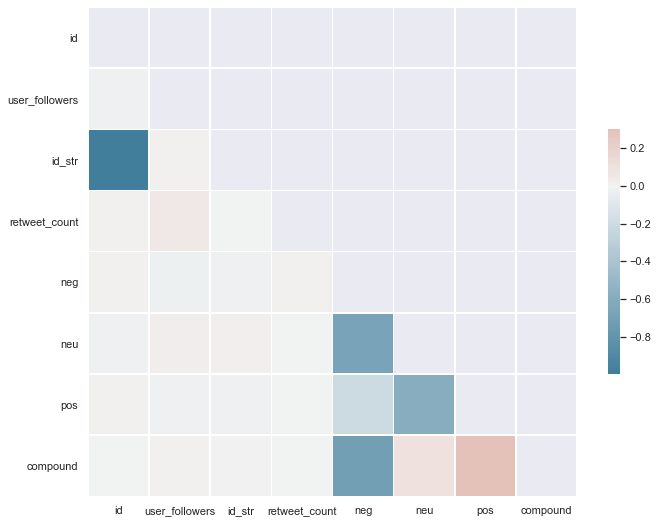

In [11]:
# Compute the correlation matrix
corr = tweets.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

57405

In [94]:
tweets.iloc[0]["created"]

'2021-04-15T13:37:19'

In [12]:
def dateify(stri):
    if type(stri) is str:
        return(stri[:10])
    else:
        return stri

In [13]:
tweets["date_created"] = tweets["created"].apply(dateify)

In [14]:
tweets.head()

,id,user_description,user_location,coordinates,text,geo,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,text_eng,neg,neu,pos,compound,sentiment,date_created
0,1,oud gemeenteraadslid voor D66,europe nl leiderdorp,NaN,net gevaccineerd. blij en dankbaar. een van mi...,NaN,EdGrootaarts,2009-12-10T18:21:52,244,1382689495179485191,2021-04-15T13:37:19,0,E8EBE9,just vaccinated. happy and grateful. one of my...,0.092,0.636,0.272,0.8802,positive,2021-04-15
1,2,Hoofdeconoom Van Lanschot. Alles in eigen naam...,amsterdam/antwerp,NaN,nee hoor. is totale bevolking. althans volgens,NaN,Luc_Aben,2011-08-19T08:40:28,1567,1382689494697148423,2021-04-15T13:37:19,0,C0DEED,"no, it is not. is total population. at least a...",0.180,0.820,0.000,-0.2960,negative,2021-04-15
2,3,"raadslid, vice-fractievoorzitter PvdA Haarlem ...","haarlem, nederland",NaN,"geel-zwarte jassen? ik heb ze nog niet gezien,...",NaN,Isabelle_Wisse,2017-12-10T19:01:10,234,1382689475193606146,2021-04-15T13:37:14,0,F5F8FA,"yellow-black coats? I haven't seen them yet, h...",0.000,0.880,0.120,0.6815,positive,2021-04-15
3,4,Sociaal libertair regionalist. Gelooft in soci...,NaN,NaN,ik ken zelfs niemand die daar wat dan ook van ...,NaN,LinksVlaams,2012-10-19T19:35:39,3386,1382689342414524422,2021-04-15T13:36:43,0,DB0000,I don't even know anyone who's had any of that...,0.263,0.737,0.000,-0.7512,negative,2021-04-15
4,5,Soms tè kritisch. Hoewel..bestaat zoiets?\n“𝘚𝘰...,bananenrepubliek nederland,NaN,vind niet zo snel iets spannend. ik weet prima...,NaN,aluhoedje33,2020-04-12T23:09:33,378,1382689321090703372,2021-04-15T13:36:37,0,F5F8FA,don't easily find something exciting. I know v...,0.107,0.618,0.275,0.7624,positive,2021-04-15


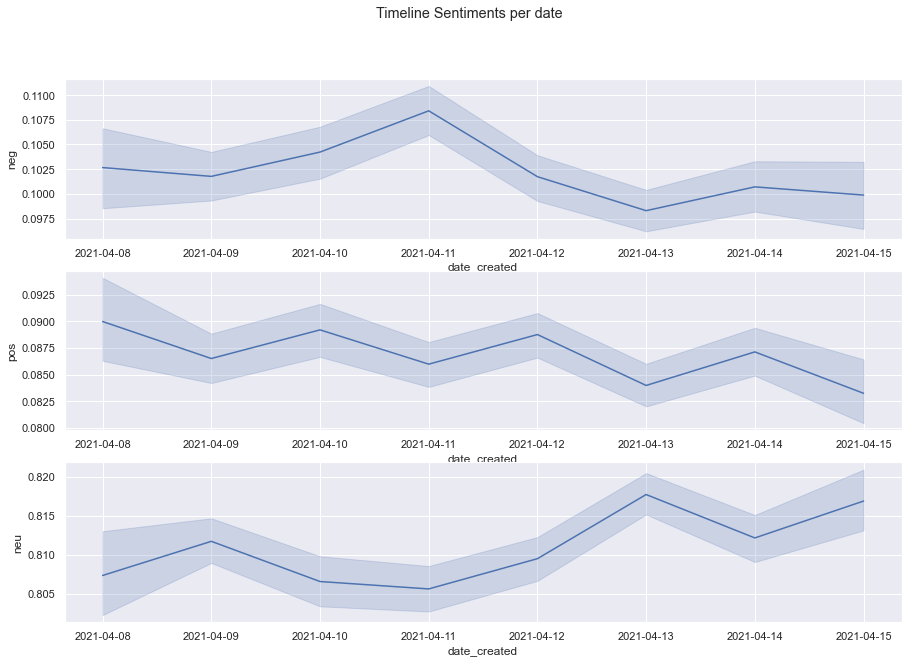

In [21]:
# Time line of three varying sentiments in major Dutch cities

#Set plot layout
sns.set(rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Timeline Sentiments per date')

lineplot_neg = sns.lineplot(ax=axes[0], x="date_created", y="neg", data=tweets, palette= "deep")
lineplot_neg.invert_xaxis()

lineplot_pos = sns.lineplot(ax=axes[1], x="date_created", y="pos", data=tweets, palette="deep")
lineplot_pos.invert_xaxis()

lineplot_neu = sns.lineplot(ax=axes[2], x="date_created", y="neu", data=tweets, palette="deep")
lineplot_neu.invert_xaxis()
